In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
infile = '../test7/histos_tba.24.npz'
with np.load(infile) as loaded:
  the_variables = loaded['variables']
  the_parameters = loaded['parameters']

In [3]:
nlayers = 16  # 5 (CSC) + 4 (RPC) + 3 (GEM) + 4 (DT)

old_x_bend = the_variables[:, nlayers*8:nlayers*9]
old_x_ring = the_variables[:, nlayers*5:nlayers*6].astype(np.int32)
old_x_fr   = the_variables[:, nlayers*6:nlayers*7].astype(np.int32)
old_x_mask = the_variables[:, nlayers*10:nlayers*11].astype(np.bool)
old_y_pt   = the_parameters[:, 0]

new_x_bend = the_variables[:, nlayers*2:nlayers*3]
new_x_ring = the_variables[:, nlayers*5:nlayers*6].astype(np.int32)
new_x_fr   = the_variables[:, nlayers*6:nlayers*7].astype(np.int32)
new_x_mask = the_variables[:, nlayers*10:nlayers*11].astype(np.bool)
new_y_pt   = the_parameters[:, 0]

In [4]:
# Styling
plt.style.use('tdrstyle.mplstyle')

old 0 1 -4.0 4.0
new 0 1 -29.0 30.0
new 0 1 0.0 [0.04192103]
new 0 1 0.0 [0.04194791]
old 1 2 -4.0 4.0
new 1 2 -16.0 16.0
new 1 2 0.0 [0.03263192]
new 1 2 0.0 [0.03264105]
old 2 1 -4.0 4.0
new 2 1 -16.0 16.0
new 2 1 0.0 [0.06806313]
new 2 1 0.0 [0.0680637]
old 2 2 -4.0 4.0
new 2 2 -16.0 16.0
new 2 2 0.0 [0.03911541]
new 2 2 0.0 [0.03911522]
old 3 1 -4.0 4.0
new 3 1 -16.0 16.0
new 3 1 0.0 [0.04195673]
new 3 1 0.0 [0.04195683]
old 3 2 -4.0 4.0
new 3 2 -16.0 16.0
new 3 2 0.0 [0.04088119]
new 3 2 0.0 [0.04088065]
old 4 1 -4.0 4.0
new 4 1 -16.0 16.0
new 4 1 0.0 [0.04950513]
new 4 1 0.0 [0.04950559]
old 4 2 -4.0 4.0
new 4 2 -16.0 16.0
new 4 2 0.0 [0.0446049]
new 4 2 0.0 [0.04460486]
old 11 1 -47.0 48.0
new 11 1 -47.0 48.0
new 11 1 0.0 [0.01460167]
new 11 1 0.0 [0.01459716]


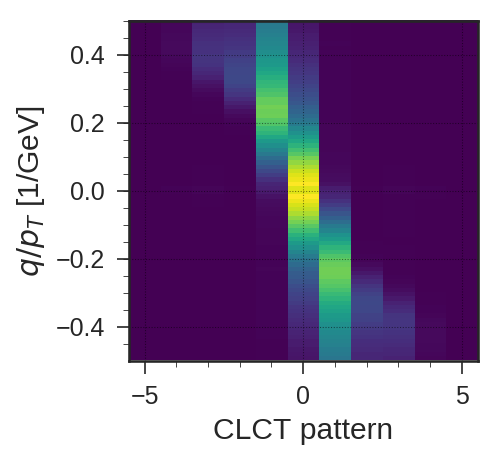

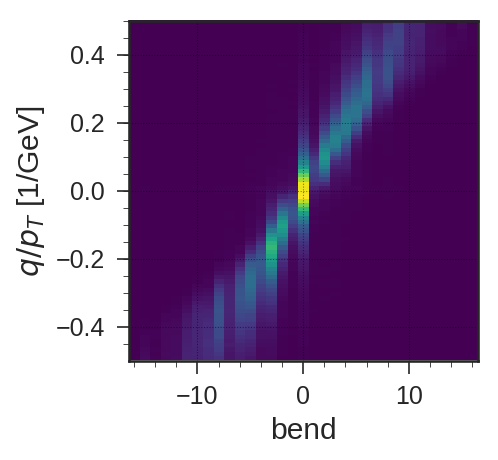

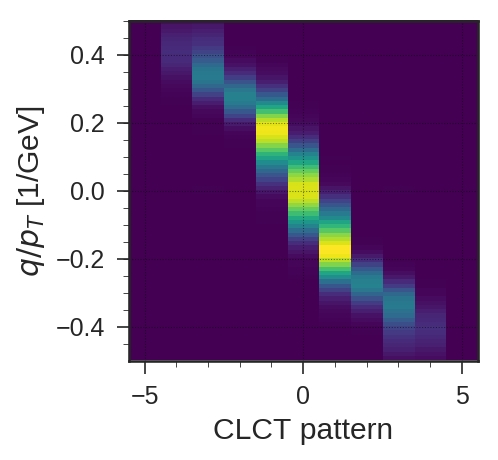

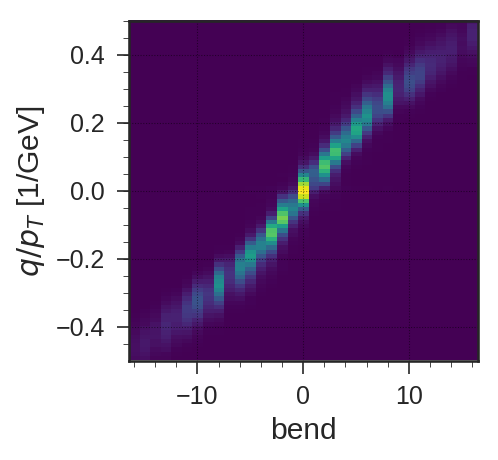

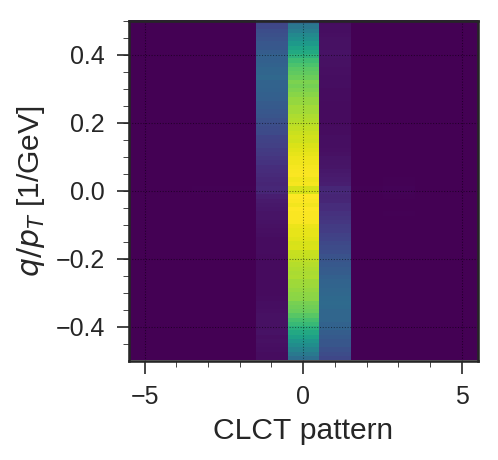

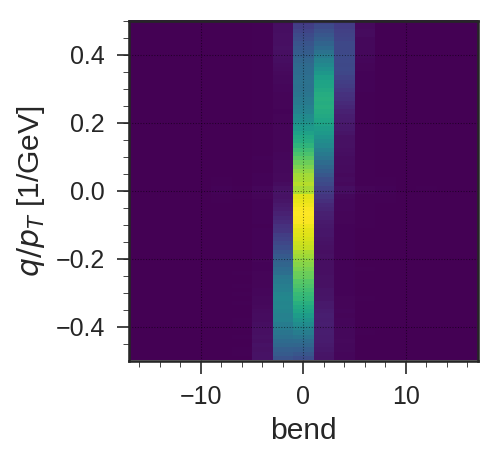

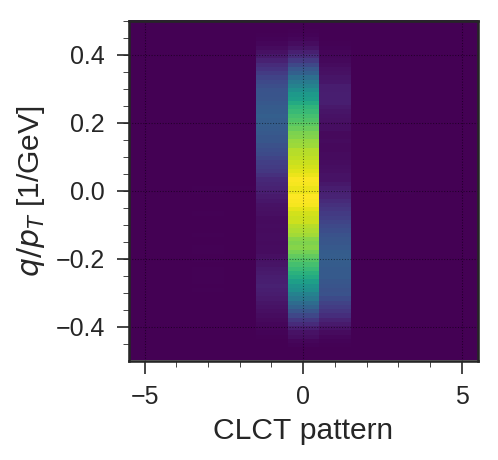

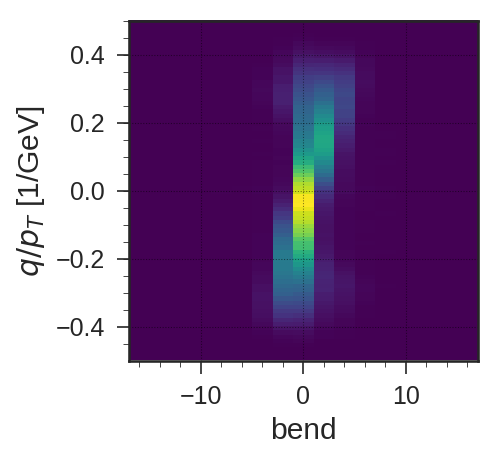

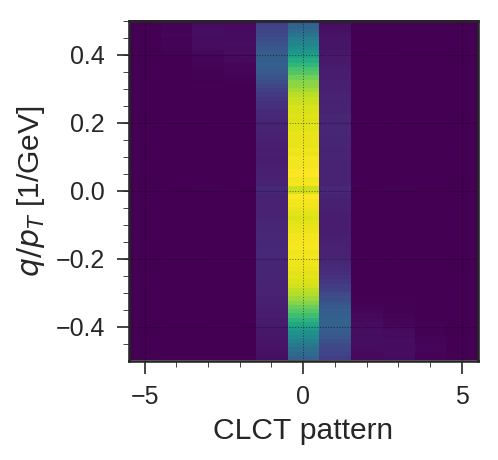

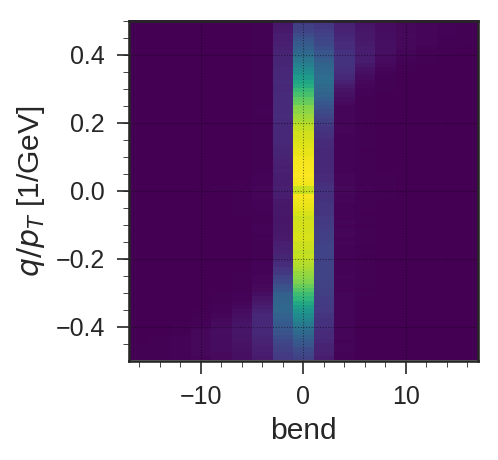

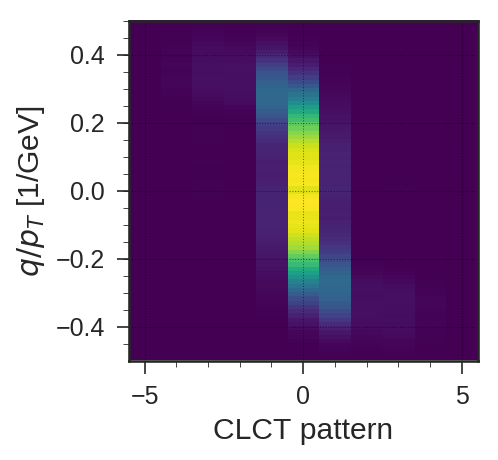

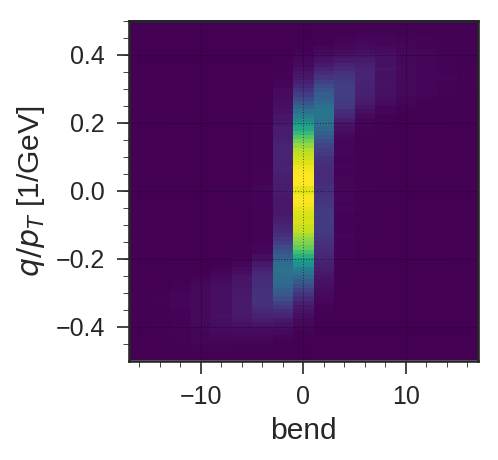

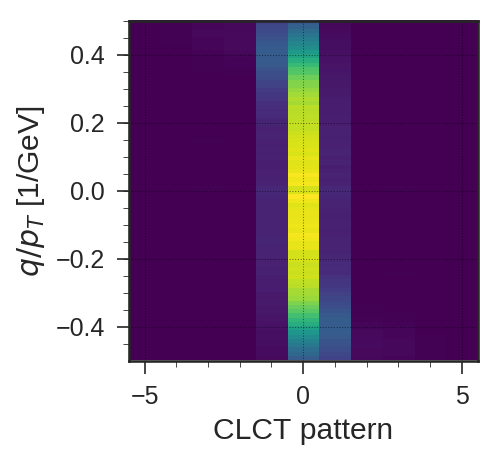

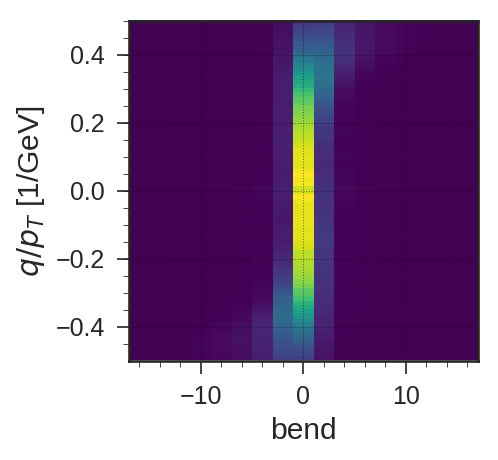

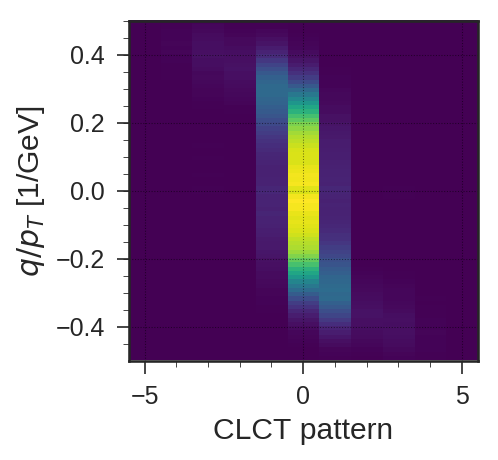

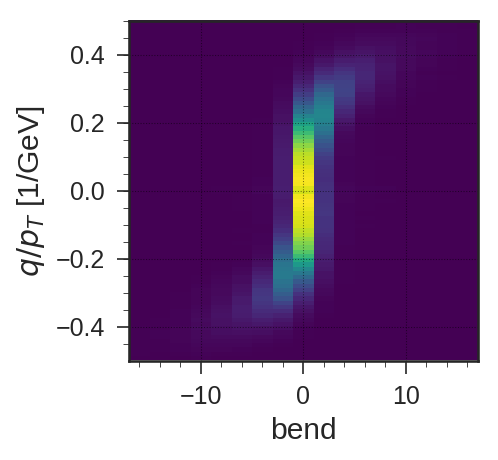

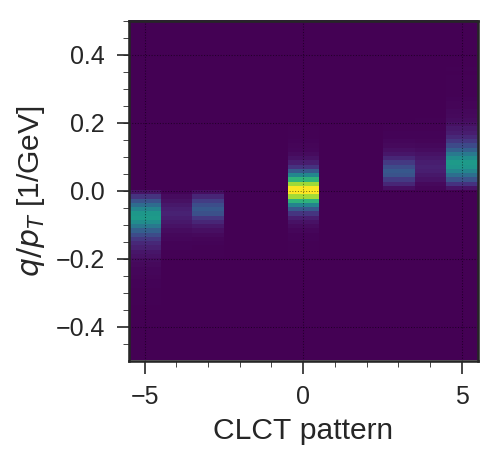

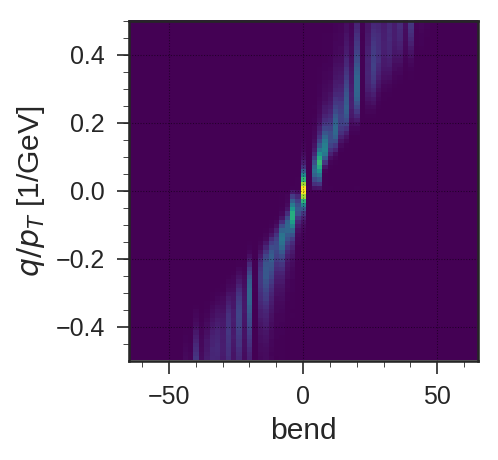

In [5]:
# Plot bend for ME1/1, ME1/2, ME2, ME3, ME4, ME0, MB1, MB2, MB3

from sklearn.linear_model import LinearRegression, Ridge

for lay in [0,1,2,3,4,11,12,13,14]:
  for ring in [1,2]:
    for i in xrange(2):  # 0: old, 1: new
      if i == 0:
        is_new = 'old'
        x_bend = old_x_bend
        x_ring = old_x_ring
        x_fr   = old_x_fr
        x_mask = old_x_mask
        y_pt   = old_y_pt
      else:
        is_new = 'new'
        x_bend = new_x_bend
        x_ring = new_x_ring
        x_fr   = new_x_fr
        x_mask = new_x_mask
        y_pt   = new_y_pt
      
      mask = x_mask[...,lay]
      if ring == 1:
        valid = ~mask & ((x_ring[...,lay] == 1) | (x_ring[...,lay] == 4))
      else:
        valid = ~mask & ((x_ring[...,lay] == 2) | (x_ring[...,lay] == 3))
      
      x_i = x_bend[valid,lay]
      y_i = y_pt[valid]
      if lay in [0,1,2,11,12,13,14]:
        x_i *= -1  # same direction as q/pt
      
      if x_i.size == 0: continue
      
      print is_new, lay, ring, np.min(x_i), np.max(x_i)
      
      if is_new == 'old':
        xmin, xmax = -5.5, 5.5
        ymin, ymax = -0.5, 0.5
        xbins = 11
        ybins = 80
        xlabel = r'CLCT pattern'
        ylabel = r'$q/p_{T}$ [1/GeV]'
        
        if lay in [12,13,14]:
          xmin, xmax = -516, 516
          xbins = 129
      else:
        lin = LinearRegression(fit_intercept=False).fit(x_i[:,np.newaxis], y_i)
        print is_new, lay, ring, lin.intercept_, lin.coef_
        rid = Ridge(fit_intercept=False, alpha=0.1).fit(x_i[:,np.newaxis], y_i)
        print is_new, lay, ring, rid.intercept_, rid.coef_
        
        xmin, xmax = -16.5, 16.5
        ymin, ymax = -0.5, 0.5
        xbins = 33
        ybins = 80
        xlabel = r'bend'
        ylabel = r'$q/p_{T}$ [1/GeV]'
        
        if lay in [2,3,4]:
          xmin, xmax = -17, 17
          xbins = 17
        elif lay in [11,]:
          xmin, xmax = -65, 65
          xbins = 65
        elif lay in [12,13,14]:
          xmin, xmax = -516, 516
          xbins = 129
      
      plt.figure(figsize=(3,3))
      plt.hist2d(x_i, y_i, bins=[xbins,ybins], range=[[xmin, xmax], [ymin, ymax]], cmap=plt.cm.viridis)
      plt.xlabel(xlabel)
      plt.ylabel(ylabel)
      continue  # end loop over i
    continue  # end loop over ring
  continue  # end loop over lay

plt.show()

old 0 1 -4.0 4.0
new 0 1 -16.0 16.0
new 0 1 0.0 [0.04243428]
new 0 1 0.0 [0.04245568]
old 0 4 -2.1668756 2.1668756
new 0 4 -15.709847 16.251566
new 0 4 0.0 [0.07619669]
new 0 4 0.0 [0.07619832]


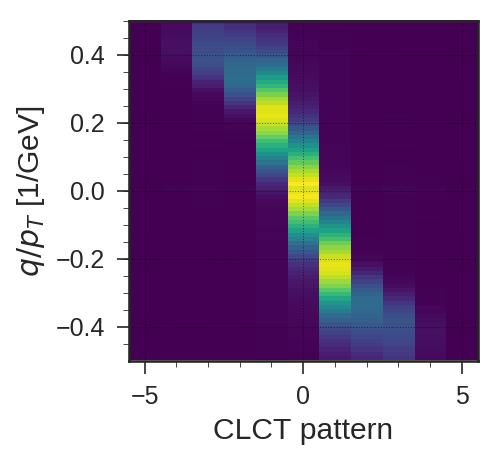

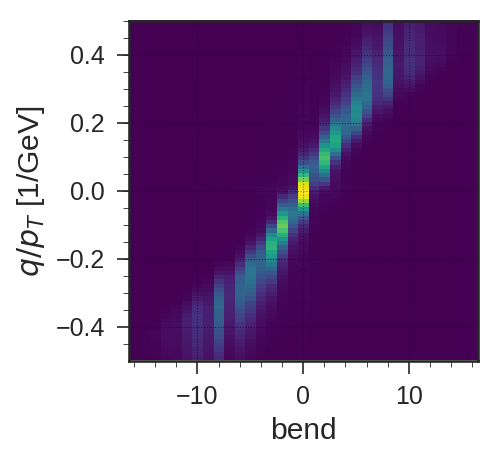

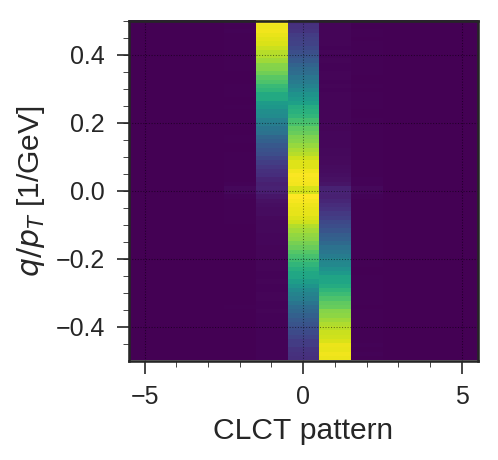

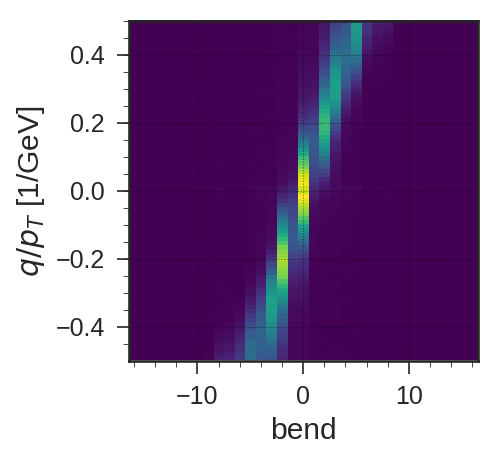

In [6]:
# Plot bend for ME1/1b, ME1/1a

from sklearn.linear_model import LinearRegression, Ridge

for lay in [0]:
  for ring in [1,4]:
    for i in xrange(2):  # 0: old, 1: new
      if i == 0:
        is_new = 'old'
        x_bend = old_x_bend
        x_ring = old_x_ring
        x_fr   = old_x_fr
        x_mask = old_x_mask
        y_pt   = old_y_pt
      else:
        is_new = 'new'
        x_bend = new_x_bend
        x_ring = new_x_ring
        x_fr   = new_x_fr
        x_mask = new_x_mask
        y_pt   = new_y_pt
      
      mask = x_mask[...,lay]
      if ring == 1:
        valid = ~mask & (x_ring[...,lay] == ring)
      else:
        valid = ~mask & (x_ring[...,lay] == ring)
      
      x_i = x_bend[valid,lay]
      y_i = y_pt[valid]
      if lay in [0,1,2,11,12,13,14]:
        x_i *= -1  # same direction as q/pt
      
      if x_i.size == 0: continue
      
      # Undo correction
      if lay == 0 and ring == 4:
        x_i = np.where(x_ring[valid,lay] == 4, x_i * 1/(0.026331/0.014264), x_i)
        
      ## Apply correction
      #if lay == 0 and ring == 4:
      #  x_i = np.where(x_ring[valid,lay] == 4, x_i * (0.07619832/0.04245568), x_i)
      
      print is_new, lay, ring, np.min(x_i), np.max(x_i)
      
      if is_new == 'old':
        xmin, xmax = -5.5, 5.5
        ymin, ymax = -0.5, 0.5
        xbins = 11
        ybins = 80
        xlabel = r'CLCT pattern'
        ylabel = r'$q/p_{T}$ [1/GeV]'
      else:
        lin = LinearRegression(fit_intercept=False).fit(x_i[:,np.newaxis], y_i)
        print is_new, lay, ring, lin.intercept_, lin.coef_
        rid = Ridge(fit_intercept=False, alpha=0.1).fit(x_i[:,np.newaxis], y_i)
        print is_new, lay, ring, rid.intercept_, rid.coef_
        
        xmin, xmax = -16.5, 16.5
        ymin, ymax = -0.5, 0.5
        xbins = 33
        ybins = 80
        xlabel = r'bend'
        ylabel = r'$q/p_{T}$ [1/GeV]'
      
      plt.figure(figsize=(3,3))
      plt.hist2d(x_i, y_i, bins=[xbins,ybins], range=[[xmin, xmax], [ymin, ymax]], cmap=plt.cm.viridis)
      plt.xlabel(xlabel)
      plt.ylabel(ylabel)
      continue  # end loop over i
    continue  # end loop over ring
  continue  # end loop over lay

plt.show()